In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

In [35]:
test_data='D:/LP-4-DL-DataSet/cifar-10-img/cifar-10-img/test'
train_data='D:/LP-4-DL-DataSet/cifar-10-img/cifar-10-img/train'


In [43]:
test_datagen=ImageDataGenerator(rescale=1.0/255)
train_datagen=ImageDataGenerator(rescale=1.0/255)

test_generator=test_datagen.flow_from_directory(
    test_data,
    target_size=(32,32),
    batch_size=2000,
    class_mode='sparse',
    shuffle='True'
    
)
train_generator=test_datagen.flow_from_directory(
    train_data,
    target_size=(32,32),
    batch_size=10000,
    class_mode='sparse',
    shuffle='True'
)

Found 9921 images belonging to 10 classes.
Found 40079 images belonging to 10 classes.


In [49]:
x_train ,y_train=train_generator[0]
x_test,y_test=test_generator[0]

In [50]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [51]:
model =keras.Sequential([
      keras.layers.Conv2D(28,(3,3), padding='same', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='Softmax')
]
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 28)        784       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 28)        0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 7168)              0         
                                                                 
 dense_12 (Dense)            (None, 300)               2150700   
                                                                 
 dropout_6 (Dropout)         (None, 300)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                3010      
                                                      

In [53]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
313/313 [==============================] - 4s 13ms/step - loss: 2.0362 - accuracy: 0.2620 - val_loss: 1.9997 - val_accuracy: 0.2860
Epoch 2/5
313/313 [==============================] - 4s 13ms/step - loss: 1.8433 - accuracy: 0.3491 - val_loss: 1.8249 - val_accuracy: 0.3680
Epoch 3/5
313/313 [==============================] - 4s 13ms/step - loss: 1.7532 - accuracy: 0.3856 - val_loss: 1.7490 - val_accuracy: 0.3780
Epoch 4/5
313/313 [==============================] - 4s 14ms/step - loss: 1.6852 - accuracy: 0.4068 - val_loss: 1.6925 - val_accuracy: 0.3960
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 1.6326 - accuracy: 0.4288 - val_loss: 1.6645 - val_accuracy: 0.4115


In [55]:
loss,accuracy=model.evaluate(x_test,y_test)
print("loss: ",loss)
print("Accuracy:",accuracy)

63/63 [==============================] - 0s 4ms/step - loss: 1.6645 - accuracy: 0.4115
loss:  1.6644564867019653
Accuracy: 0.4115000069141388


In [58]:
predict_value=model.predict(x_test)
y =to_categorical(y_test)


63/63 [==============================] - 0s 4ms/step
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [76]:
labels = list(test_generator.class_indices.keys())
print(labels)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Actual :  automobile
Predicted:  airplane


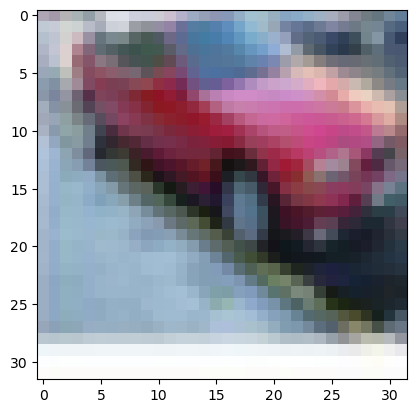

In [77]:
n=24
plt.imshow(x_test[n])
print("Actual : ",labels[np.argmax(y[n])])
print("Predicted: ", labels[np.argmax(predict_value[n])])

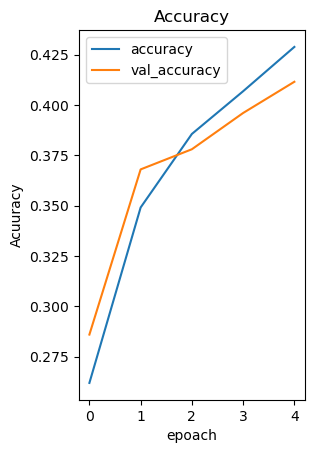

In [73]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoach')
plt.ylabel('Acuuracy')
plt.legend(['accuracy','val_accuracy'])